<a href="https://colab.research.google.com/github/Mahmoudkhaled17/DIAMOND-PRICE-PREDICTION/blob/main/Diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d shivam2503/diamonds

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/shivam2503/diamonds
License(s): unknown
diamonds.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip diamonds.zip

Archive:  diamonds.zip
replace diamonds.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('diamonds.csv')

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
print(df["cut"].value_counts())
print(df["color"].value_counts())
print(df["clarity"].value_counts())

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


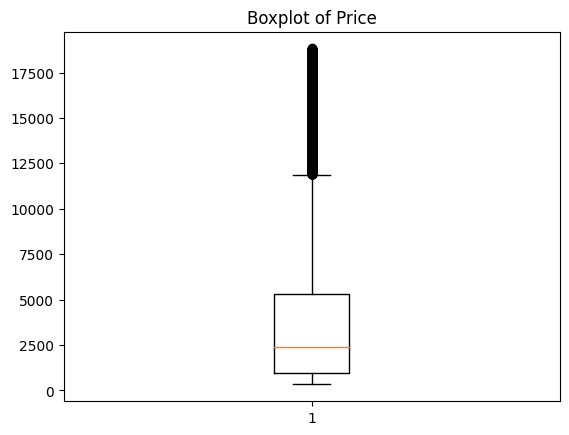

In [ ]:
plt.boxplot(df["price"])
plt.title("Boxplot of Price")
plt.show()

In [ ]:
q1=df["price"].quantile(0.25)
q3=df["price"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df=df[(df["price"]>=lower_bound) & (df["price"]<=upper_bound)]

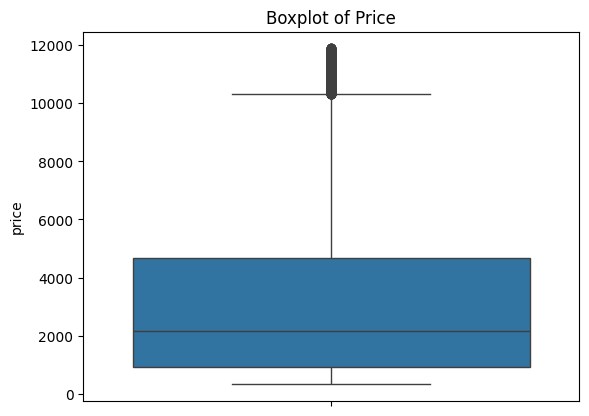

In [ ]:
sns.boxplot(df["price"])
plt.title("Boxplot of Price")
plt.show()

In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
cat=(sorted(df["color"].unique(),reverse=True))
cat

['J', 'I', 'H', 'G', 'F', 'E', 'D']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
le=OrdinalEncoder(categories=[cat])

In [ ]:
df['cut'][df["cut"]=="Fair"]=0
df['cut'][df["cut"]=="Good"]=1
df['cut'][df["cut"]=="Very Good"]=2
df['cut'][df["cut"]=="Premium"]=3
df['cut'][df["cut"]=="Ideal"]=4

<ipython-input-125-66172c8f3085>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut'][df["cut"]=="Fair"]=0
<ipython-input-125-66172c8f3085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut'][df["cut"]=="Good"]=1
<ipython-input-125-66172c8f3085>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut'][df["cut"]=="Very Good"]=2
<ipython-input-125-66172c8f3085>:4: SettingWithCopyWarning: 
A value is trying to be set on a c

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
le.fit(df[["color"]])

OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']])

In [ ]:
df['color']=le.transform(df[["color"]])

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5.0,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5.0,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5.0,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1.0,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0.0,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
l2=OrdinalEncoder(categories=[['I1','SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF' ]])

In [ ]:
l2.fit(df[["clarity"]])
df["clarity"]=l2.transform(df[["clarity"]])

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5.0,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0.0,1.0,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

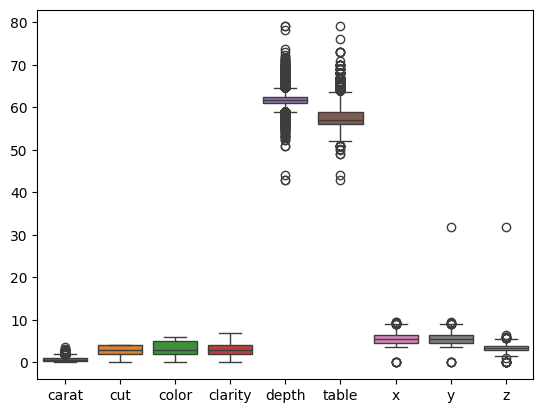

In [ ]:
sns.boxplot(df.iloc[:,[0,1,2,3,4,5,7,8,9]])

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5.0,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0.0,1.0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6.0,2.0,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6.0,2.0,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6.0,2.0,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,2.0,1.0,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
for i in [0,1,2,3,4,5,7,8,9]:
  q1=df.iloc[:,i].quantile(0.25)
  q3=df.iloc[:,i].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  df.iloc[:,i]=np.where(df.iloc[:,i]<upper_bound,df.iloc[:,i],df.iloc[:,i].mean())
  df.iloc[:,i]=np.where(df.iloc[:,i]>lower_bound,df.iloc[:,i],df.iloc[:,i].mean())

<Axes: >

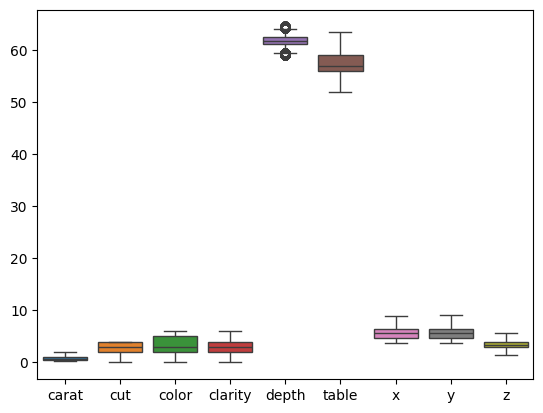

In [ ]:
sns.boxplot(df.iloc[:,[0,1,2,3,4,5,7,8,9]])

In [ ]:
df.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000
mean,0.715800,3.452659,2.945426,61.795877,57.339029,3159.460833,5.582648,5.585599,3.448142
std,0.368502,1.689697,1.480374,1.033997,2.061884,2764.700316,0.991708,0.984727,0.614231
min,0.200000,0.000000,0.000000,59.100000,52.000000,326.000000,3.730000,3.680000,1.410000
25%,0.380000,2.000000,2.000000,61.200000,56.000000,911.000000,4.670000,4.680000,2.880000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2155.000000,5.582965,5.580000,3.430000
75%,1.010000,5.000000,4.000000,62.400000,59.000000,4669.000000,6.430000,6.420000,3.980000
max,1.950000,6.000000,6.000000,64.500000,63.400000,11883.000000,8.930000,9.020000,5.600000


<Axes: >

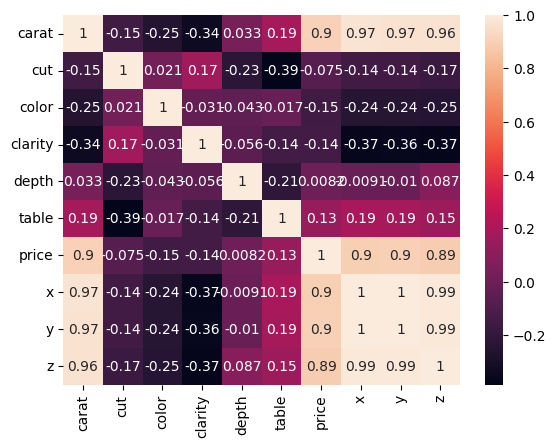

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.drop(["x","y","depth"],axis=1,inplace=True)
df.drop(["z"],axis=1,inplace=True)

<Axes: >

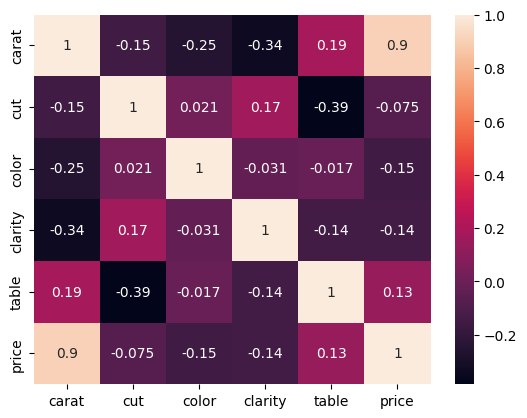

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='price', ylabel='Count'>

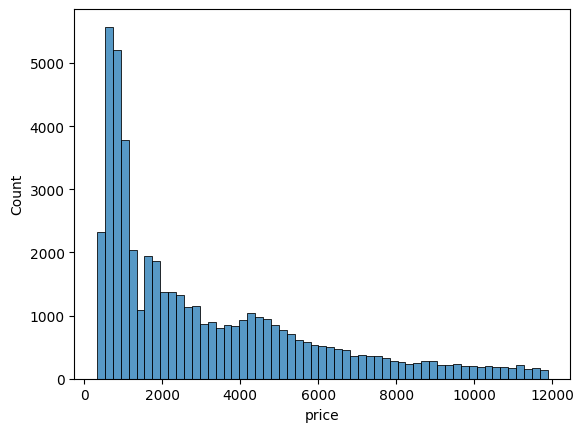

In [ ]:
sns.histplot(df["price"])


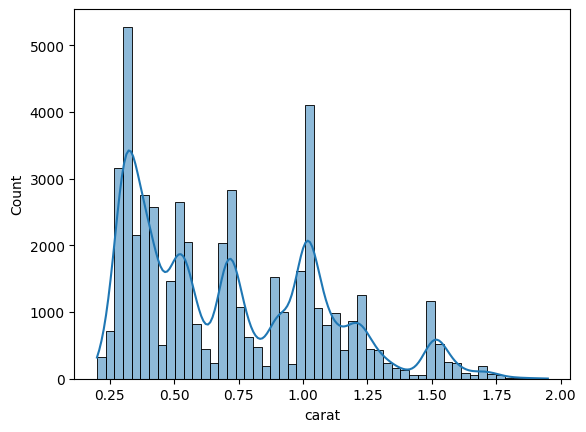

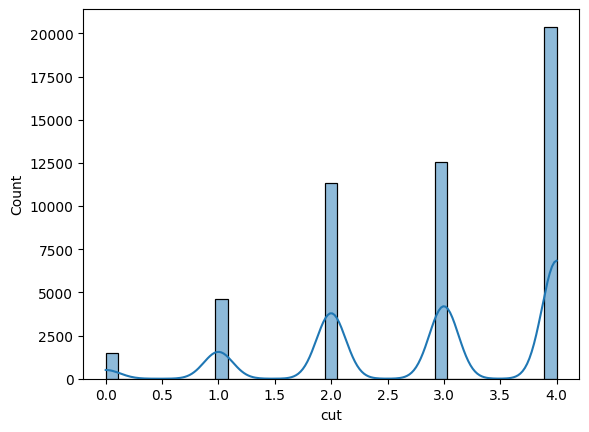

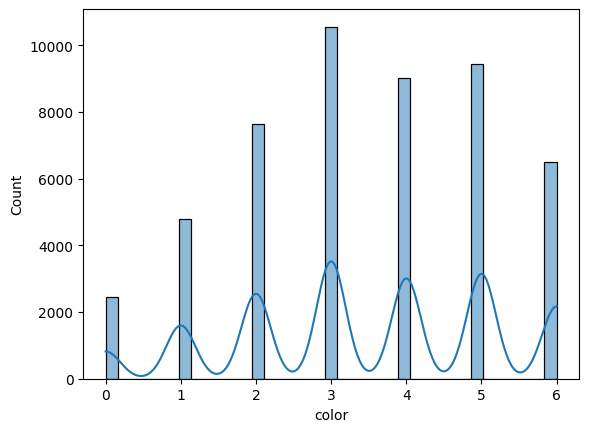

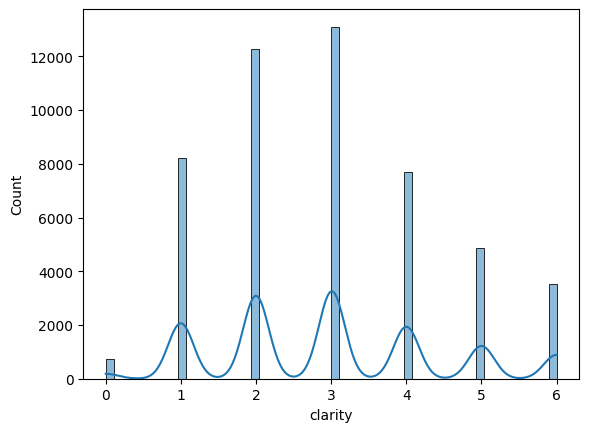

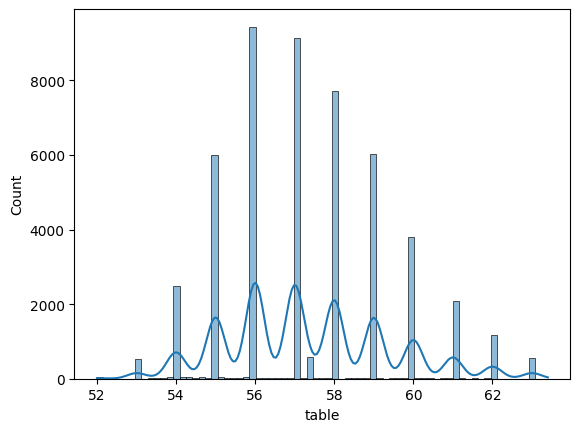

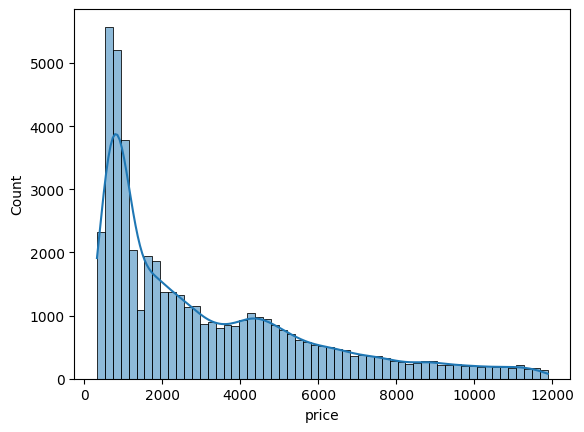

In [ ]:
for i in df.columns:
  sns.histplot(df[i],kde=True)
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
df2=sc.fit_transform(df)

In [ ]:
df2=pd.DataFrame(df2,columns=df.columns)

In [ ]:
df2.head()

,carat,cut,color,clarity,table,price
0,-1.318326,0.975368,0.915760,-1.314158,-1.134425,-1.024881
1,-1.372600,0.083878,0.915760,-0.638646,1.775564,-1.024881
2,-1.318326,-1.699102,0.915760,0.712377,0.040179,-1.024519
3,-1.155503,0.083878,-1.451552,0.036865,0.320570,-1.021987
4,-1.101228,-1.699102,-2.043379,-1.314158,0.320570,-1.021626


In [ ]:
x_data=df2.drop("price",axis=1)
y_data=df2["price"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial features transformation
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x_train)

In [ ]:
lr.fit(X_poly,y_train)

LinearRegression()

In [ ]:
x_test2=poly_features.transform(x_test)

In [ ]:
from sklearn.metrics import r2_score
y_pred=lr.predict(x_test2)
r2_score(y_test,y_pred)

0.9149803668812319

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
r2_score(y_test,rf.predict(x_test))

0.9782917240931785

In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
r2_score(y_test,xgb.predict(x_test))

0.9809650779773164

In [ ]:
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(xgb, files)

In [ ]:

with open('model_pkl' , 'rb') as f:
    model = pickle.load(f)
# check prediction

In [ ]:
model.predict()

array([-0.47539324, -0.7277832 ,  0.8633841 , ...,  0.5942028 ,
       -0.8234589 ,  0.9088897 ], dtype=float32)